In [15]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import datetime as dt
import urllib.request as req
import time
import pyodbc
import csv

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-ALU3L0K\SQLEXPRESS;'
                      'Database=edge;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

In [81]:
t1 = pd.read_sql("select sym, [open], high, low, [close], volume, sector, sDate as Date from stockdata2018 where sym = 'SPY' and sdate between '2017-11-29' and '2018-11-29'", conn)
t4 = pd.read_sql("select sym, [open], high, low, [close], volume, sector, sDate as Date from stockdata2018 where sym = 'QQQ' and sdate between '2017-11-29' and '2018-11-29'", conn)
t2 = pd.read_sql("select count(f.sym) as call_option_count, s.sym, s.[Date], s.[close], s.volume, f.Sentiment from flowtotal f left  join stockdata2018 s on s.sym = f.sym and s.sdate = f.date where s.sym = 'SPY' and s.sdate between '2017-11-29' and '2018-11-29' and f.Sentiment = 'long call' group by s.[date], s.sym, s.volume, s.[close], f.Sentiment ",conn)
t3 = pd.read_sql("select count(f.sym) as call_option_count, s.sym, s.[Date], s.[close], s.volume, f.Sentiment from flowtotal f left join stockdata2018 s on s.sym = f.sym and s.sdate = f.date where s.sym = 'QQQ' and s.sdate between '2017-11-29' and '2018-11-29' and f.Sentiment = 'long call' group by s.[date], s.sym, s.volume, s.[close], f.Sentiment ",conn)

df1 = pd.DataFrame(t1)
df1 = df1.set_index(df1['Date'])

df4 = pd.DataFrame(t4)
df4 = df4.set_index(df4['Date'])

df2 = pd.DataFrame(t2)
df2 = df2.set_index(df2['Date'])

df3 = pd.DataFrame(t3)
df3 = df3.set_index(df3['Date'])




In [60]:
#df3

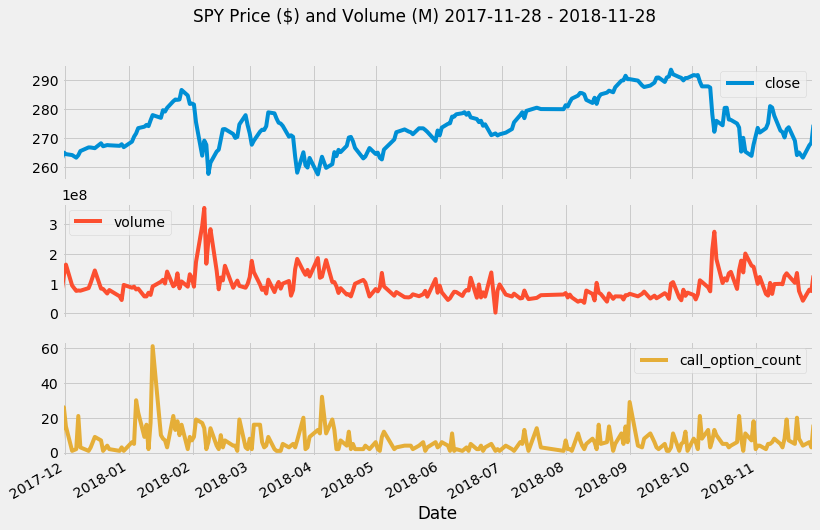

In [82]:
df2[["close", "volume", "call_option_count"]].plot(label = 'SPY',figsize=(12,8),\
      subplots = True, title = 'SPY Price ($) and Volume (M) 2017-11-28 - 2018-11-28')
#plt.subtitle("2017-11-28 - 2018-11-28")

plt.show()

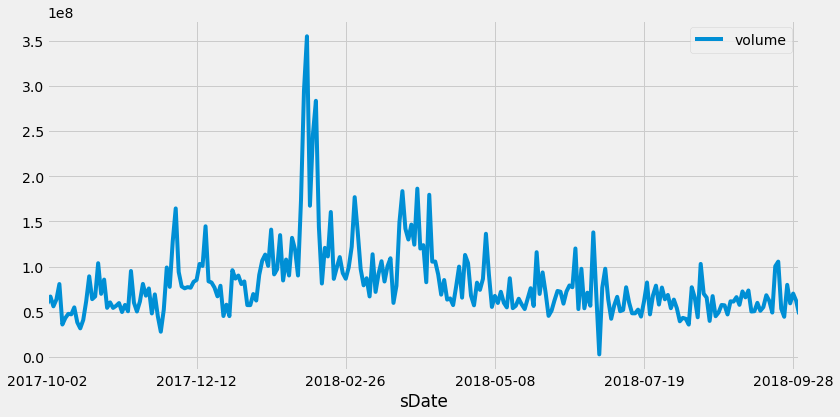

In [83]:

data.tail()
data.plot(subplots = False, figsize=(12,6))
plt.legend()
plt.show()

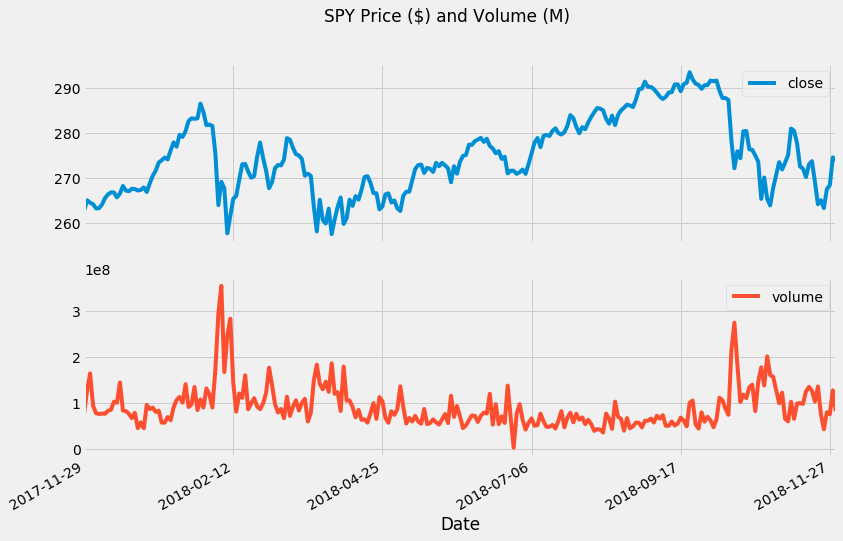

In [84]:

df1[["close", "volume"]].plot(label = 'SPY',figsize=(12,8), subplots = True, title = 'SPY Price ($) and Volume (M)')
plt.legend()
#df1["volume"].plot(label = 'SPY Volume',figsize=(12,6), color = 'green', subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF7D56C978>,
      dtype=object)

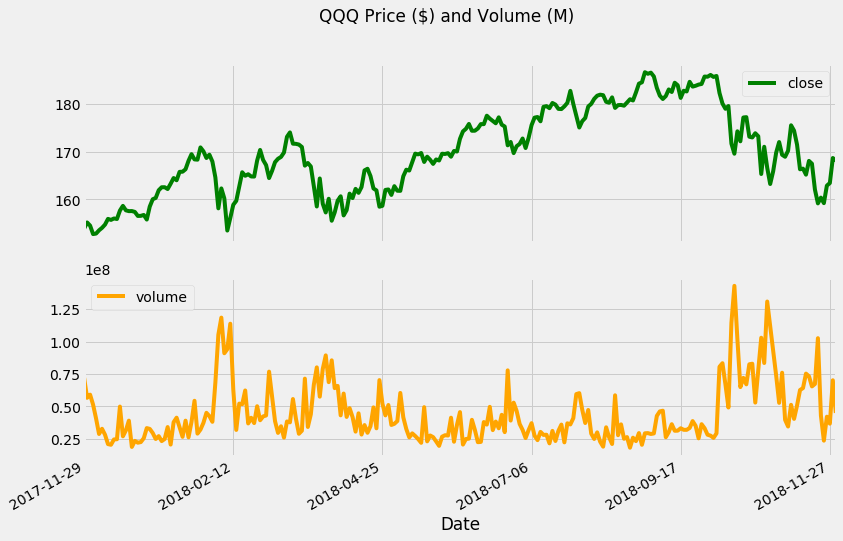

In [85]:
df4[["close", "volume"]].plot(label = 'QQQ',figsize=(12,8), subplots = True, title = 'QQQ Price ($) and Volume (M)', color = ['green','orange'])

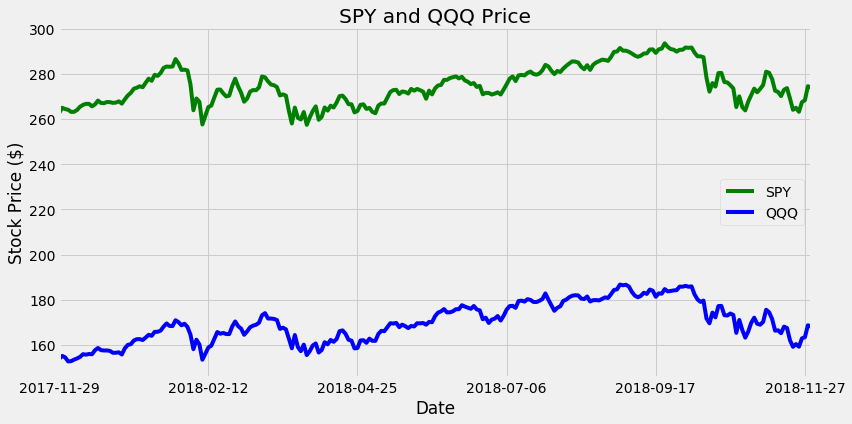

In [86]:
startdate = dt.datetime(2017,10,2)
enddate = dt.datetime(2018,10,3)
plt.ylabel('Stock Price ($)')
plt.xlabel('Date (10/02/2017 - 10/02/2018)')
df1["close"].plot(label = 'SPY',figsize=(12,6), color = 'green', title = "SPY and QQQ Price")
#df1["volume"].plot(subplots = True)
df4["close"].plot(label = 'QQQ', color = 'blue')
plt.legend()
#fig.autofmt_xdate()
#plt.savefig("SPY_vs_QQQ.png")
plt.show()


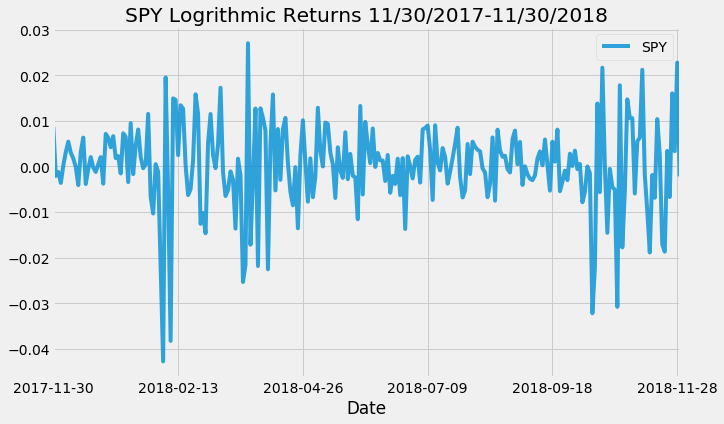

In [87]:
rets = np.log(df1['close'] / df1['close'].shift(1))
rets.head()
rets.dropna(inplace = True)
rets.plot(figsize=(10,6), alpha = .8, title = "SPY Logrithmic Returns 11/30/2017-11/30/2018", label = "SPY")
plt.legend()

#df1[["close", "volume"]].plot(label = 'SPY',figsize=(12,8), subplots = True, title = 'SPY Price ($) and Volume (M)')

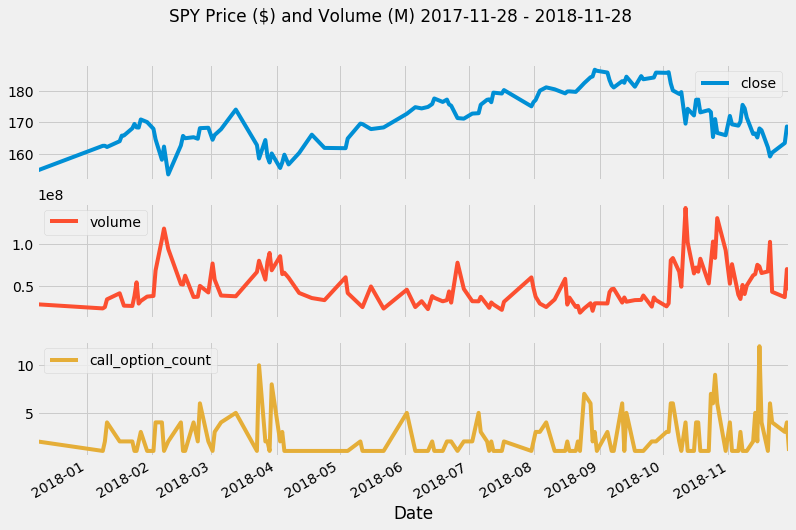

In [88]:
df3[["close", "volume", "call_option_count"]].plot(label = 'QQQ',figsize=(12,8),\
      subplots = True, title = 'QQQ Price ($) and Volume (M) 2017-11-28 - 2018-11-28')
#plt.subtitle("2017-11-28 - 2018-11-28")

plt.show()